# Clasificador con algoritmo Naive Bayes

## Importar librerías

- numpy: manejo de vectores.
- pandas: manipulación de DataFrame.
- seaborn: gráfica de matriz de correlación.
- sklearn: división de datos de entrenamiento y test, modelo y métricas.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

## Dataset

En el archivo wine.names están especificadas las variables contenidas en el dataset. A partir de esto se define una lista para darle un nombre a cada columna y también se agrega el nombre de la primera columna que corresponde al tipo de vino.

In [55]:
columns = [
    "Type",
    "Alcohol",
 	"Malic acid",
 	"Ash",
	"Alcalinity of ash",  
 	"Magnesium",
	"Total phenols",
 	"Flavanoids",
 	"Nonflavanoid phenols",
 	"Proanthocyanins",
	"Color intensity",
 	"Hue",
 	"OD280/OD315 of diluted wines",
 	"Proline"
]

Se carga el dataset y se le añaden los nombres de las columnas que se definieron anteriormente.

In [56]:
wines = pd.read_csv("wine.data", header = None, names = columns)

In [57]:
print(f"El dataset tiene {len(wines)} observaciones y {len(wines.columns)} características.")

El dataset tiene 178 observaciones y 14 características.


Con los métodos *info()* y *head()* se visualiza la información del dataset y sus primeras 5 filas respectivamente, con el fin de conocer los datos con los que se trabajará. 

In [58]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [59]:
wines.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Como los datos son íntegramente numéricos, una buena opción de visualizar su relación es a través de una matriz de correlación graficada como mapa de calor. Los recuadros más oscuros y más claros indicarán una mayor correlación entre variables (positiva y negativa). Para entrenar el modelo se utilizarán todas las variables que estén correlacionadas al menos en un 60%.

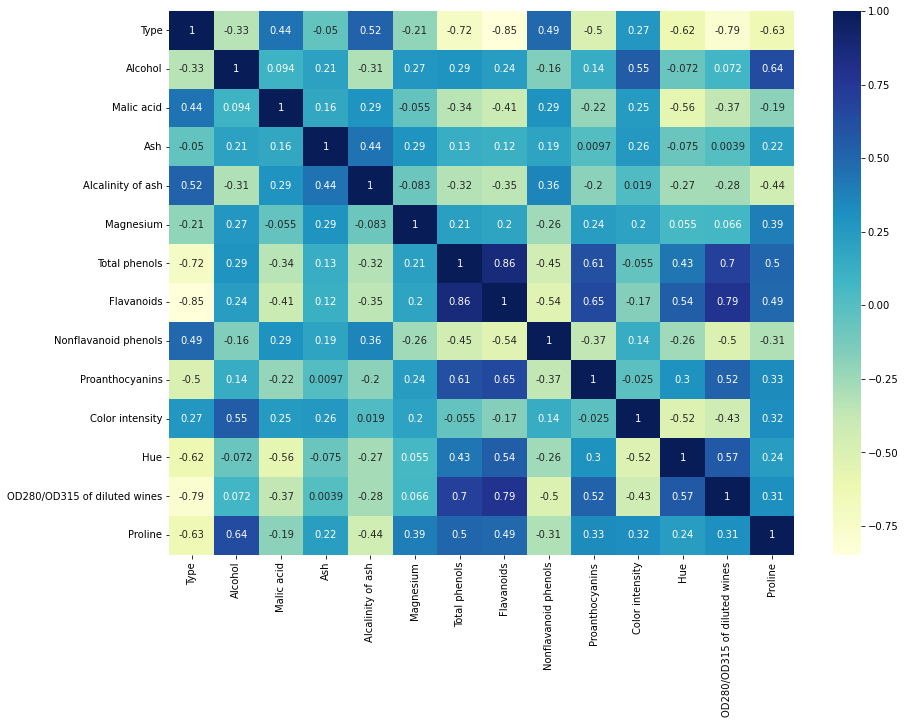

In [60]:
plt.subplots(figsize = (14,10))
sns.heatmap(wines.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Clasificador

Se crea un nuevo DataFrame sólo con las variables seleccionadas anteriormente. También se define una serie con los tipos de vino (la variable que se quiere predecir).

In [48]:
X = wines[["Total phenols", 
           "Flavanoids", 
           "OD280/OD315 of diluted wines", 
           "Alcohol", 
           "Proline", 
           "Proanthocyanins"]]
y = wines["Type"]

Se separa la información en un conjunto de entrenamiento y otro de prueba. El 70% de los datos será utilizado para entrenar el modelo y el restante 30% para probarlo y comparar resultados.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
wine_classifier = GaussianNB()
wine_classifier.fit(X_train, y_train)
y_pred = wine_classifier.predict(X_test)

La matriz de confusión indicará los cantidad de valores clasificados correcta e incorrectamente.

In [62]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[19  0  0]
 [ 1 19  2]
 [ 0  1 12]]


Resultados del modelo:
- Logra clasificar exitosamente el 100% de los vinos de tipo 1.
- Clasifica correctamente el 86.36% de los vinos (19) de tipo 2, el 4.55% (1) los clasifica incorrectamente como tipo 1 y el 9.09% (2) incorrectamente como tipo 3.
- Clasifica correctamente el 92.31% (12) de los vinos de tipo 3 y el restante 7.69% (1) lo clasifica incorrectamente como tipo 2.    

In [63]:
precision = precision_score(y_test, y_pred, average = "micro")
print(f"La precisión del clasificador es de: {round(precision * 100,2)}%")

La precisión del clasificador es de: 92.59%


Con este porcentaje de precisión no es crítico realizar finetuning, pero se realizará con el fin de aprender y comprender el procedimiento además de comparar resultados.

## Finetuning

Investigando, una forma de hacer finetuning en un modelo Naive Bayes Gaussiano es a través de su parámetro *var_smoothing* que corresponde a una porción de la varianza más grande del conjunto de datos que será agregada a los otros para "estabilizar" los cálculos. Para encontrar un óptimo valor de *var_smoothing* se puede utilizar GridSearchCV para iterar con diferentes parámetros, evaluar el modelo y entregar la mejor opción. Para este trabajo se consideran 5 folds para el cross validation y 100 valores de *var_smoothing*.

Referencias:
- [Documentación oficial GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
- [Documentación oficial GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [How to tune GaussianNB?](https://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb)
- [Scikit-Learn - Naive Bayes](https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-naive-bayes)


In [52]:
from sklearn.model_selection import GridSearchCV

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator = nb_classifier, 
                 param_grid = params_NB, 
                 cv = None,   # use any cross validation technique 
                 verbose = 1, 
                 scoring = 'accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 2.310129700083158e-06}

El resultado final que corresponde al óptimo valor de *var_smoothing* se utilizará para entrenar un nuevo clasificador, obtener resultados y comparar su precisión con el anteriormente desarrollado.

In [53]:
wine_classifier_ft = GaussianNB(var_smoothing = 2.310129700083158e-06)
wine_classifier_ft.fit(X_train, y_train)
y_pred_ft = gs_NB.predict(X_test)
conf_matrix_ft = confusion_matrix(y_test, y_pred_ft)
print(conf_matrix_ft)
precision_ft = precision_score(y_test, y_pred, average = "micro")
print(f"La precisión del clasificador es de: {round(precision_ft * 100,2)}%")

[[19  0  0]
 [ 0 19  3]
 [ 0  1 12]]
La precisión del clasificador es de: 92.59%


La precisión de este clasificador es exactamente la misma que la del anterior. La única diferencia en los resultados es que para el tipo 2, clasifica erróneamente 3 muestras como tipo 3, a diferencia del clasificador anterior que clasificaba 1 muestra como tipo 1 y 2 muestras como tipo 3. Con esto se puede suponer que el modelo *GaussianNB()* por defecto vendrá configurado con los valores óptimos en sus parámetros.